SPRINT 2 TEAM ID:PNT2022TMID22022

Importing required Libraries

In [ ]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [ ]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

Loading dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


Analyze the data

In [ ]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[3]

1

In [ ]:
import matplotlib.pyplot as plt

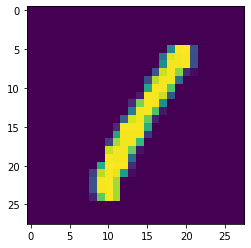

In [ ]:
plt.imshow(x_train[3])

Reshaping the data

In [ ]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

Applying one hot encoding

In [ ]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Add CNN Layers

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2131 - accuracy: 0.9535 - val_loss: 0.0827 - val_accuracy: 0.9729
Epoch 2/5
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0720 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.1015 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.1098 - val_accuracy: 0.9763


Observing the Metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.10984234511852264, 0.9763000011444092]
